In [26]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt

# Plot settings
%matplotlib inline
plt.style.use('ggplot')
fontsize = 20 # size for x and y ticks
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams.update({'font.size': fontsize})

con = psycopg2.connect(dbname='eicu', user='postgres', host='localhost', port=5432)



q2 = """select
    DISTINCT
    t.patientunitstayid as pid
    ,t.treatmentid as tid
    ,t.treatmentoffset as toffset
from 
	eicu_crd.treatment t
where t.treatmentstring like 'pulmonary|ventilation and oxygenation|prone position'
order by t.patientunitstayid"""

query =""" 
select 
	fi.pid,
    fi.lab_time,
    pa.res/fi.res as "PF ratio"
from 
	(select
     	patientunitstayid as pid
     	,case
       when labresult is not NULL THEN labresult/100
       when labresult is NULL then replace(labresulttext,'%%','')::FLOAT/100
      end as res
     	,labresultoffset as lab_time
     from
     	eicu_crd.lab
     where 
     	patientunitstayid in (select patientunitstayid from patient
                            where uniquepid = %(upid)s )
     	and labname = 'FiO2') as fi
     ,(select 
      	patientunitstayid as pid
      	,labresult as res
      	,labresultoffset as lab_time
      from
      	eicu_crd.lab
      where
      	patientunitstayid in (select patientunitstayid from patient
                            where uniquepid = %(upid)s)
      	and labname = 'paO2') as pa
where pa.lab_time = fi.lab_time
and pa.pid = fi.pid
order by pa.lab_time"""

q3 = """
    select patientunitstayid from patient
    where uniquepid = %(upid)s
                            """

In [33]:
param = {'upid': '007-15085'}
tr = pd.read_sql_query(query, con, params=param)
tr2 = pd.read_sql_query(q2, con, params=None)
df3 = tr.merge(tr2, how='left', on='pid').copy()
# tr3 = pd.read_sql_query(q3, con, params=param)
# tr3
df3['closed'] = ((df3['toffset'] - df3['lab_time'])/60).astype(float)

df3


,pid,lab_time,PF ratio,tid,toffset,closed
0,963786,87,116.666667,27854969,7334,120.783333
1,963786,87,116.666667,27854988,5018,82.183333
2,963786,87,116.666667,27855026,42362,704.583333
3,963786,813,237.142857,27854969,7334,108.683333
4,963786,813,237.142857,27854988,5018,70.083333
5,963786,813,237.142857,27855026,42362,692.483333
6,963786,1483,162.500000,27854969,7334,97.516667
7,963786,1483,162.500000,27854988,5018,58.916667
8,963786,1483,162.500000,27855026,42362,681.316667
9,963786,2852,170.769231,27854969,7334,74.700000


In [34]:
tr.sort_values('lab_time',inplace=True)
tr2.sort_values('toffset',inplace=True)

df4 = pd.merge_asof(tr2,tr, right_on='lab_time', left_on='toffset', direction='forward').copy()
df2 = pd.merge_asof(tr2,tr, right_on='lab_time', left_on='toffset', direction='backward').copy()

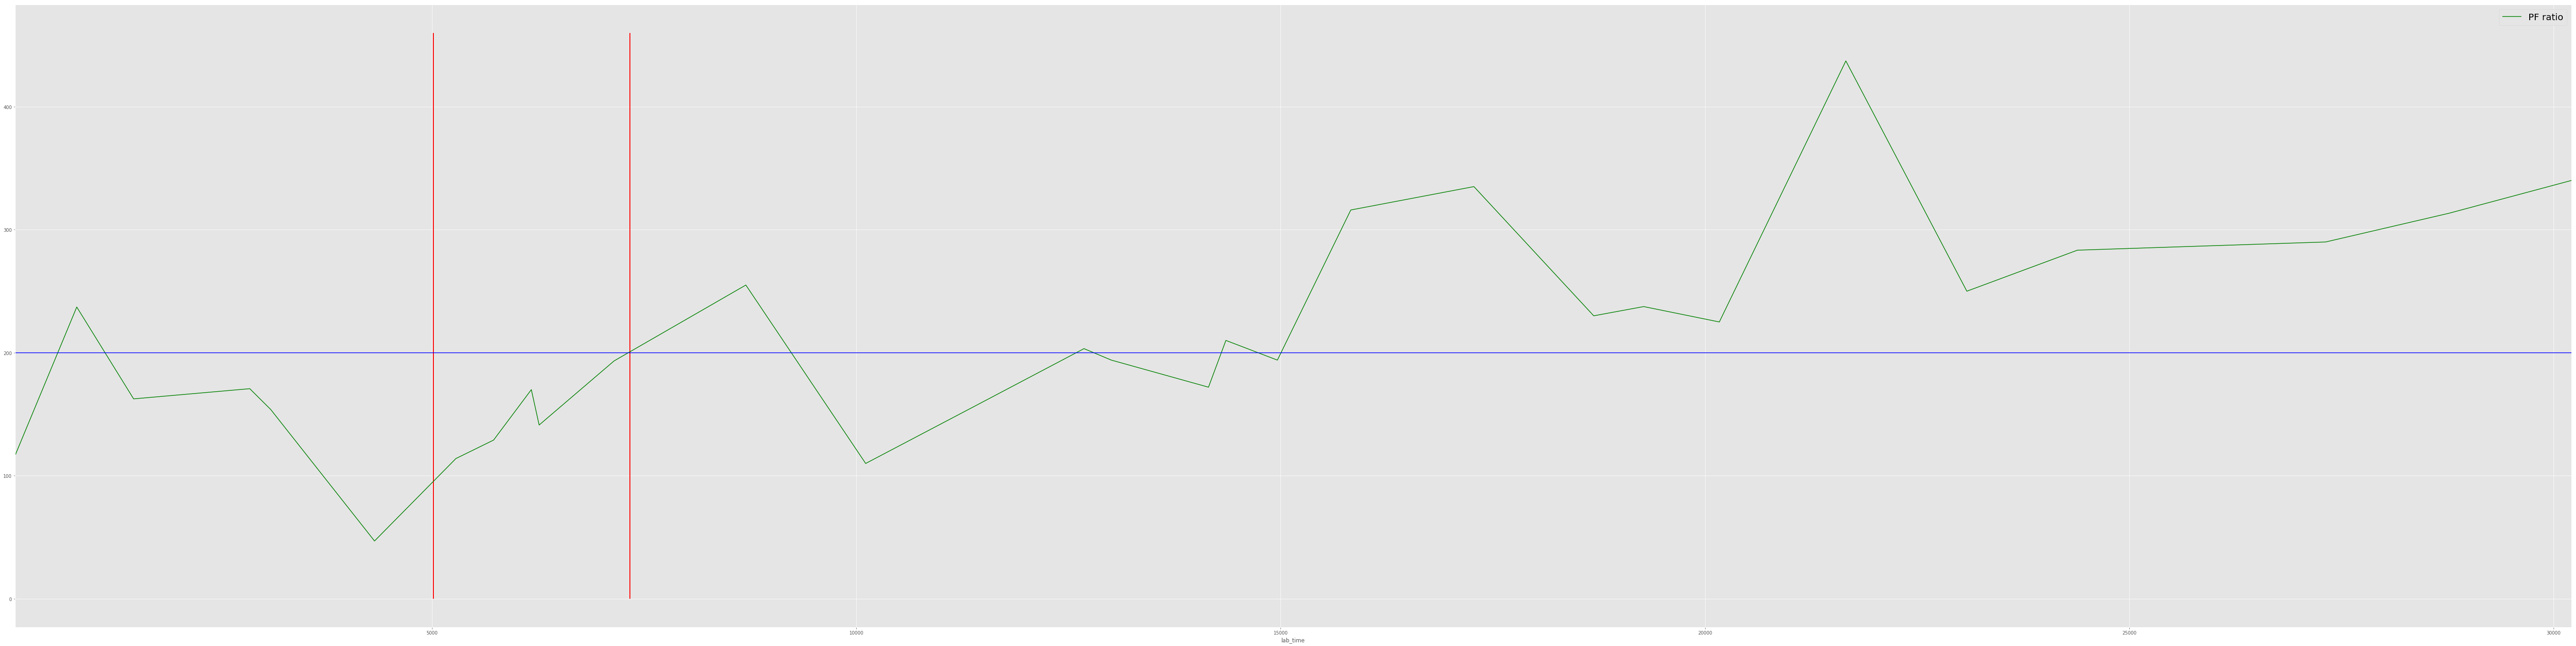

In [35]:
df5 = df3[['PF ratio','lab_time','toffset']].copy()
df6 = df3[['PF ratio', 'toffset']].copy()
%matplotlib inline

ax=df5.plot(x=['lab_time'],y='PF ratio', color='g', label='PF ratio',figsize=(100,25))
ax.vlines(x=df5['toffset'],ymin=0,ymax=460, color='r', label='prone change')
ax.axhline(y=200,color='b')
plt.show()